In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder 
import tensorflow as tf
from keras.layers import Dense
from keras import Sequential
import joblib
import warnings
from imblearn.over_sampling import SMOTE
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [248]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [249]:
data.shape

(7043, 21)

In [250]:
df = data.copy()

In [ ]:
df.drop('customerID', axis = 1, inplace= True)

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [253]:
#Seprating numerical data from categorical
cat = df.select_dtypes(exclude='number')
num = df.select_dtypes(include='number')
print('Categorical Data')
display(cat.head())
print('Numerical Data')
display(num.head())

Categorical Data


,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes


Numerical Data


,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70


In [254]:
df['TotalCharges'].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [255]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [256]:
cat = df.select_dtypes(exclude='number')
num = df.select_dtypes(include='number')
print('Categorical Data')
display(cat.head())
print('Numerical Data')
display(num.head())

Categorical Data


,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


Numerical Data


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [257]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [258]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [259]:
def plotter(data, col1, col2, col3, dep):
    plt.figure(figsize=(30,4))
    sns.set_theme(style='darkgrid')

    plt.subplot(1,4,1)
    sns.countplot(data, x= col1, hue=dep)
    plt.title(f'barplot of {col1} showing {dep}')

    plt.subplot(1,4,2)
    fig = sns.countplot(data, x= col2, hue = dep)
    for i in fig.containers:
        fig.bar_label(i)
    plt.title(f'countplot of {col2} showing {dep}')

    plt.subplot(1,4,3)
    fig = sns.countplot(data, x= col3, hue = dep)
    for i in fig.containers:
        fig.bar_label(i)
    plt.title(f'countplot of {col3} showing {dep}')

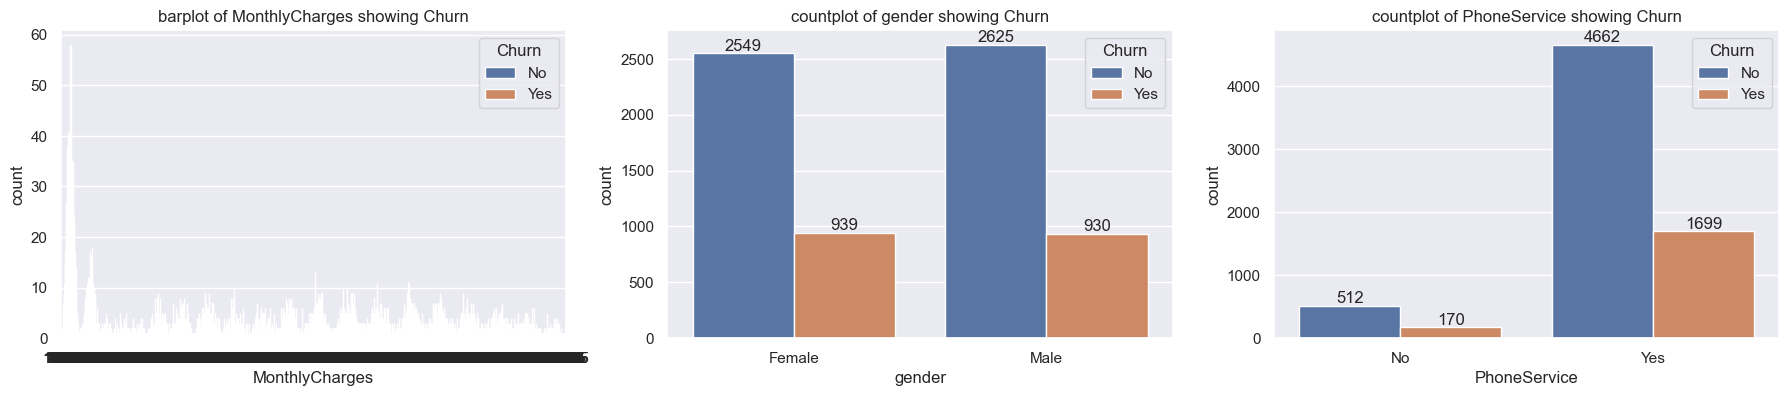

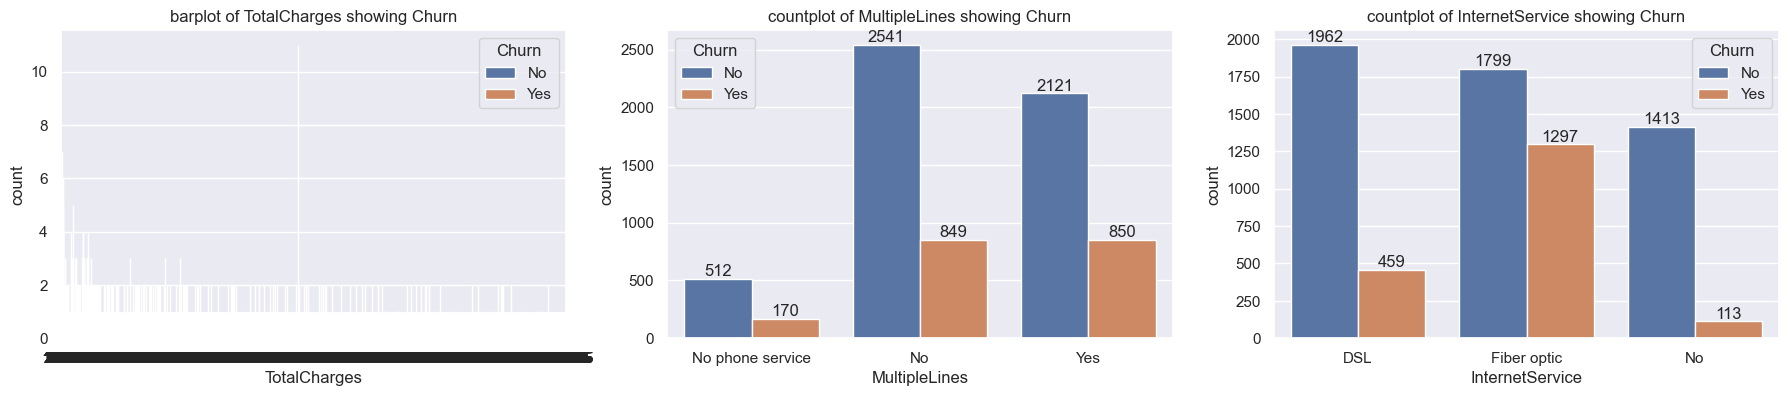

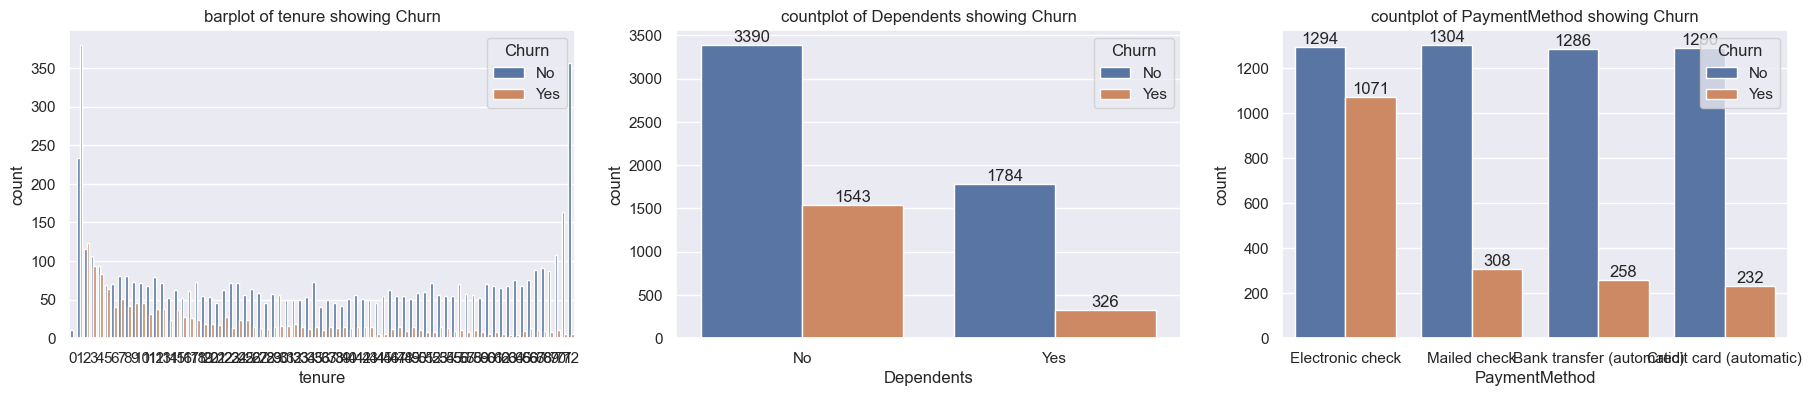

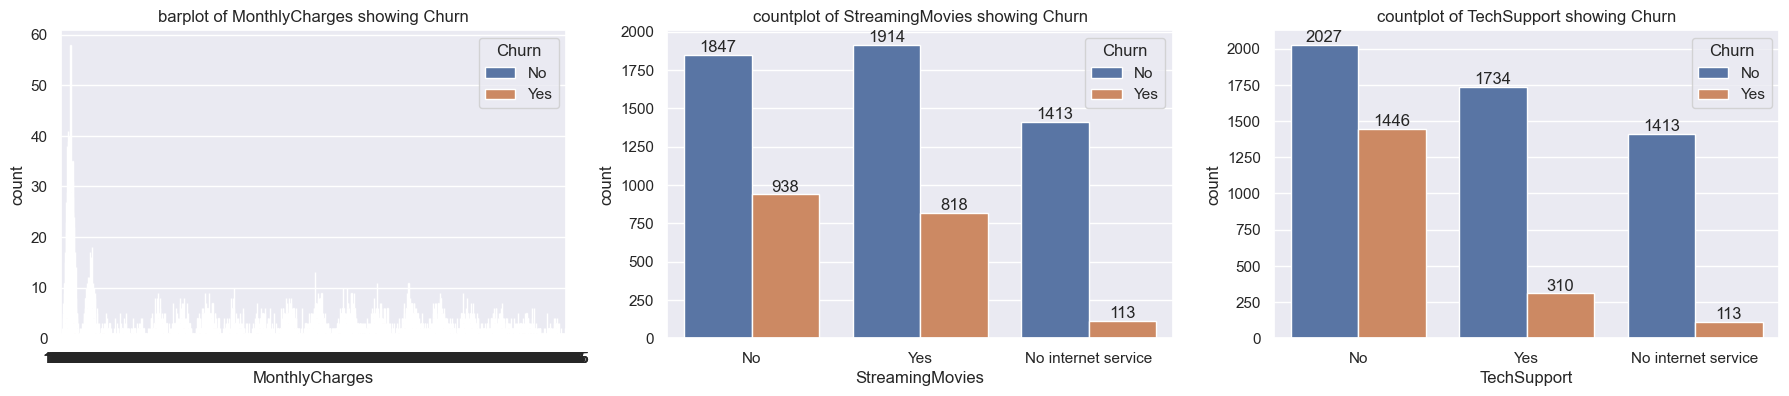

In [260]:
plotter(df, 'MonthlyCharges', 'gender', 'PhoneService', 'Churn')
plotter(df, 'TotalCharges', 'MultipleLines', 'InternetService', 'Churn')
plotter(df, 'tenure', 'Dependents', 'PaymentMethod', 'Churn')
plotter(df, 'MonthlyCharges', 'StreamingMovies', 'TechSupport', 'Churn')

In [261]:
for col in df[1:]:
    print(f"df[{col}]: {df[col].unique()}\n")

df[gender]: ['Female' 'Male']

df[SeniorCitizen]: [0 1]

df[Partner]: ['Yes' 'No']

df[Dependents]: ['No' 'Yes']

df[tenure]: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

df[PhoneService]: ['No' 'Yes']

df[MultipleLines]: ['No phone service' 'No' 'Yes']

df[InternetService]: ['DSL' 'Fiber optic' 'No']

df[OnlineSecurity]: ['No' 'Yes' 'No internet service']

df[OnlineBackup]: ['Yes' 'No' 'No internet service']

df[DeviceProtection]: ['No' 'Yes' 'No internet service']

df[TechSupport]: ['No' 'Yes' 'No internet service']

df[StreamingTV]: ['No' 'Yes' 'No internet service']

df[StreamingMovies]: ['No' 'Yes' 'No internet service']

df[Contract]: ['Month-to-month' 'One year' 'Two year']

df[PaperlessBilling]: ['Yes' 'No']

df[PaymentMethod]: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit ca

In [262]:
no_internet_svc_cols = ['MultipleLines','OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies' ]
for i in no_internet_svc_cols:
    df[i].replace('No internet service', 'No', inplace= True)
    df[i].replace('No phone service', 'No', inplace=True)


for col in df:
    print(f"df[{col}]: {df[col].unique()}\n")

df[gender]: ['Female' 'Male']

df[SeniorCitizen]: [0 1]

df[Partner]: ['Yes' 'No']

df[Dependents]: ['No' 'Yes']

df[tenure]: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

df[PhoneService]: ['No' 'Yes']

df[MultipleLines]: ['No' 'Yes']

df[InternetService]: ['DSL' 'Fiber optic' 'No']

df[OnlineSecurity]: ['No' 'Yes']

df[OnlineBackup]: ['Yes' 'No']

df[DeviceProtection]: ['No' 'Yes']

df[TechSupport]: ['No' 'Yes']

df[StreamingTV]: ['No' 'Yes']

df[StreamingMovies]: ['No' 'Yes']

df[Contract]: ['Month-to-month' 'One year' 'Two year']

df[PaperlessBilling]: ['Yes' 'No']

df[PaymentMethod]: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

df[MonthlyCharges]: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]

df[TotalCharges]: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 

In [263]:
zeros_ones_col = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'Churn', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']

for i in zeros_ones_col:
    df[i] = df[i].replace({'Yes' : 1, 'No': 0})
    df[i] = df[i].replace({'Male' : 0, 'Female': 1})


for col in df:
    print(f"df[{col}]: {df[col].unique()}\n")

df[gender]: [1 0]

df[SeniorCitizen]: [0 1]

df[Partner]: [1 0]

df[Dependents]: [0 1]

df[tenure]: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

df[PhoneService]: [0 1]

df[MultipleLines]: [0 1]

df[InternetService]: ['DSL' 'Fiber optic' 'No']

df[OnlineSecurity]: [0 1]

df[OnlineBackup]: [1 0]

df[DeviceProtection]: [0 1]

df[TechSupport]: [0 1]

df[StreamingTV]: [0 1]

df[StreamingMovies]: [0 1]

df[Contract]: ['Month-to-month' 'One year' 'Two year']

df[PaperlessBilling]: [1 0]

df[PaymentMethod]: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

df[MonthlyCharges]: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]

df[TotalCharges]: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]

df[Churn]: [0 1]



In [264]:
others_col = ['InternetService', 'Contract', 'PaymentMethod']

encoder = OneHotEncoder()

for i in others_col:
    encoded = encoder.fit_transform(df[[i]])
    encoded_df = pd.DataFrame(encoded.toarray(), columns = encoder.get_feature_names_out([i]))
    new_df = pd.concat([df, encoded_df], axis=1)
    df = new_df
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,DSL,0,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,0,34,1,0,DSL,1,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,0,0,0,2,1,0,DSL,1,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0,0,45,0,0,DSL,1,0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1,0,0,0,2,1,0,Fiber optic,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [265]:
df = new_df.copy()

In [266]:
df.drop(['InternetService', 'Contract', 'PaymentMethod'], axis =1, inplace= True)

In [267]:
cols_to_scale = ['MonthlyCharges', 'TotalCharges', 'tenure']

for i in cols_to_scale:
    scaler = StandardScaler()
    df[i] = scaler.fit_transform(df[[i]])
    joblib.dump(scaler, open(f'{i}_scaler', 'wb'))

In [268]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,-1.277445,0,0,0,1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,0,0.066327,1,0,1,0,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,0,0,0,-1.236724,1,0,1,1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0,0,0.514251,0,0,1,0,1,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1,0,0,0,-1.236724,1,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [269]:
x = df.drop('Churn', axis = 1)
y = df.Churn

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state= 50)

display(xtrain.shape)
display(xtest.shape)
display(ytrain.shape)
display(ytest.shape)

(5634, 26)

(1409, 26)

(5634,)

(1409,)

In [270]:
model = Sequential([
    Dense(26, input_shape=(26,), activation='relu'),
    Dense(200, activation='relu'),
    Dense(200, activation='relu'),
    Dense(200, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model.compile(
    optimizer='adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

model.fit(xtrain,ytrain, epochs = 50, batch_size=1000, verbose=2, validation_split=0.1)

Epoch 1/50
6/6 - 1s - 221ms/step - accuracy: 0.6535 - loss: 0.6305 - val_accuracy: 0.7323 - val_loss: 0.5433
Epoch 2/50
6/6 - 0s - 12ms/step - accuracy: 0.7337 - loss: 0.5279 - val_accuracy: 0.7323 - val_loss: 0.4739
Epoch 3/50
6/6 - 0s - 10ms/step - accuracy: 0.7688 - loss: 0.4656 - val_accuracy: 0.7996 - val_loss: 0.4330
Epoch 4/50
6/6 - 0s - 9ms/step - accuracy: 0.7866 - loss: 0.4447 - val_accuracy: 0.7943 - val_loss: 0.4283
Epoch 5/50
6/6 - 0s - 11ms/step - accuracy: 0.7830 - loss: 0.4449 - val_accuracy: 0.8067 - val_loss: 0.4251
Epoch 6/50
6/6 - 0s - 13ms/step - accuracy: 0.7917 - loss: 0.4376 - val_accuracy: 0.8103 - val_loss: 0.4212
Epoch 7/50
6/6 - 0s - 11ms/step - accuracy: 0.7951 - loss: 0.4299 - val_accuracy: 0.8121 - val_loss: 0.4199
Epoch 8/50
6/6 - 0s - 13ms/step - accuracy: 0.7929 - loss: 0.4286 - val_accuracy: 0.8103 - val_loss: 0.4169
Epoch 9/50
6/6 - 0s - 12ms/step - accuracy: 0.7980 - loss: 0.4259 - val_accuracy: 0.8121 - val_loss: 0.4144
Epoch 10/50
6/6 - 0s - 13ms/

In [271]:
ypred = model.predict(xtest)
ypred

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.3264988 ],
       [0.02846219],
       [0.00122551],
       ...,
       [0.01715811],
       [0.5083863 ],
       [0.37912205]], dtype=float32)

In [272]:
y_pred = []
for i in ypred:
    if i>0.5:
        y_pred.append(1) 
    else:
        y_pred.append(0)

In [273]:
compare = pd.DataFrame()
compare['Actual'] = ytest
compare['Predicted'] = y_pred

compare.head(30)

,Actual,Predicted
5585,1,0
3317,0,0
6875,0,0
6074,1,1
1758,0,0
3239,0,0
644,0,0
3844,1,0
5924,0,0
3107,0,0


In [274]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1041
           1       0.63      0.48      0.54       368

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



<Axes: xlabel='Churn', ylabel='count'>

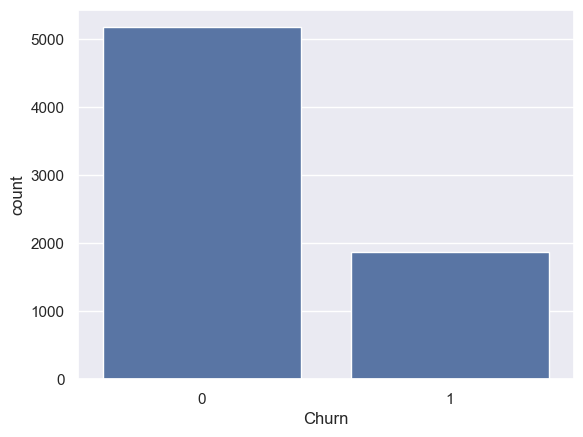

In [275]:
#plot to show imbalanced nature of dataset with respect to churn and as shown under support above
sns.countplot(data = df, x='Churn')

In [276]:
cm = confusion_matrix(ytest, y_pred)

Text(0.5, 22.249999999999993, 'Predicted')

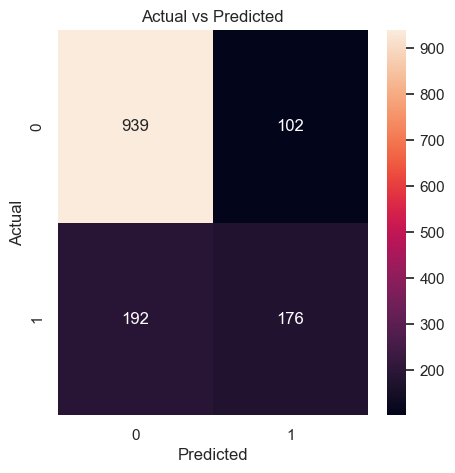

In [277]:
plt.figure(figsize=(5,5))
plt.title('Actual vs Predicted')
sns.heatmap(cm, annot=True, fmt='.4g')
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [283]:
# Address imbalance samples with SMOTE
sm = SMOTE(sampling_strategy='auto', random_state=100)
x_resampled, y_resampled = sm.fit_resample(x,y)

display(x_resampled.shape)
display(y_resampled.shape)

(10348, 26)

(10348,)

In [284]:
xtrain, xtest, ytrain, ytest = train_test_split(x_resampled,y_resampled, test_size = 0.2, random_state= 50)

display(xtrain.shape)
display(xtest.shape)
display(ytrain.shape)
display(ytest.shape)

(8278, 26)

(2070, 26)

(8278,)

(2070,)

<Axes: xlabel='Churn', ylabel='count'>

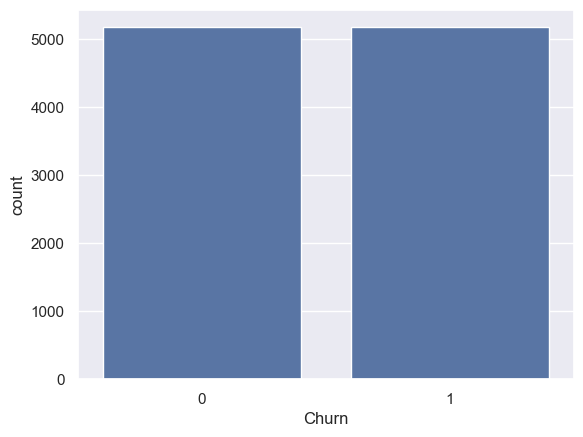

In [285]:
new_balanced_smote = pd.concat([x_resampled, y_resampled], axis =1)
sns.countplot(data =df, x= new_balanced_smote['Churn'])

In [286]:
model.fit(xtrain, ytrain, epochs=50, batch_size=1000, validation_split=0.1, verbose=2)

Epoch 1/50
8/8 - 0s - 12ms/step - accuracy: 0.7713 - loss: 0.4770 - val_accuracy: 0.7995 - val_loss: 0.4204
Epoch 2/50
8/8 - 0s - 10ms/step - accuracy: 0.7936 - loss: 0.4458 - val_accuracy: 0.7850 - val_loss: 0.4269
Epoch 3/50
8/8 - 0s - 9ms/step - accuracy: 0.8004 - loss: 0.4384 - val_accuracy: 0.8007 - val_loss: 0.4213
Epoch 4/50
8/8 - 0s - 10ms/step - accuracy: 0.8085 - loss: 0.4231 - val_accuracy: 0.7971 - val_loss: 0.4131
Epoch 5/50
8/8 - 0s - 10ms/step - accuracy: 0.8137 - loss: 0.4161 - val_accuracy: 0.7947 - val_loss: 0.4115
Epoch 6/50
8/8 - 0s - 10ms/step - accuracy: 0.8154 - loss: 0.4101 - val_accuracy: 0.8056 - val_loss: 0.4118
Epoch 7/50
8/8 - 0s - 12ms/step - accuracy: 0.8176 - loss: 0.4038 - val_accuracy: 0.8043 - val_loss: 0.4112
Epoch 8/50
8/8 - 0s - 8ms/step - accuracy: 0.8211 - loss: 0.3983 - val_accuracy: 0.8043 - val_loss: 0.4095
Epoch 9/50
8/8 - 0s - 11ms/step - accuracy: 0.8268 - loss: 0.3910 - val_accuracy: 0.8031 - val_loss: 0.4121
Epoch 10/50
8/8 - 0s - 10ms/st

In [287]:
ypred = model.predict(xtest)
ypred

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step


array([[9.7560692e-01],
       [5.6672063e-02],
       [1.3562123e-04],
       ...,
       [5.6347454e-01],
       [9.1631597e-01],
       [4.9464673e-01]], dtype=float32)

In [288]:
y_pred = []
for i in ypred:
    if i >0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)


In [298]:
compare = pd.DataFrame()
compare['Actual'] = ytest
compare['Predicted'] = y_pred

compare.head(30)

,Actual,Predicted
8620,1,1
7074,1,0
6985,0,0
625,0,0
486,0,1
5204,0,0
7831,1,1
851,0,0
1425,0,0
3205,0,0


In [290]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81      1041
           1       0.79      0.86      0.82      1029

    accuracy                           0.81      2070
   macro avg       0.82      0.81      0.81      2070
weighted avg       0.82      0.81      0.81      2070



In [291]:
cm = confusion_matrix(ytest,y_pred)

Text(0.5, 22.249999999999993, 'Predicted')

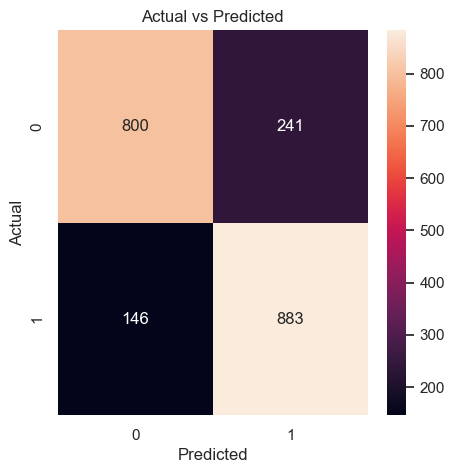

In [292]:
plt.figure(figsize=(5,5))
plt.title('Actual vs Predicted')
sns.heatmap(cm, annot=True, fmt='.4g')
plt.ylabel('Actual')
plt.xlabel('Predicted')